In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd

sc.settings.verbosity = 3               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

Running Scanpy 1.5.1, on 2020-07-26 14:17.


In [2]:
## Custom adapted Gene Set Enrichment Code
import ma_gsea as gsea

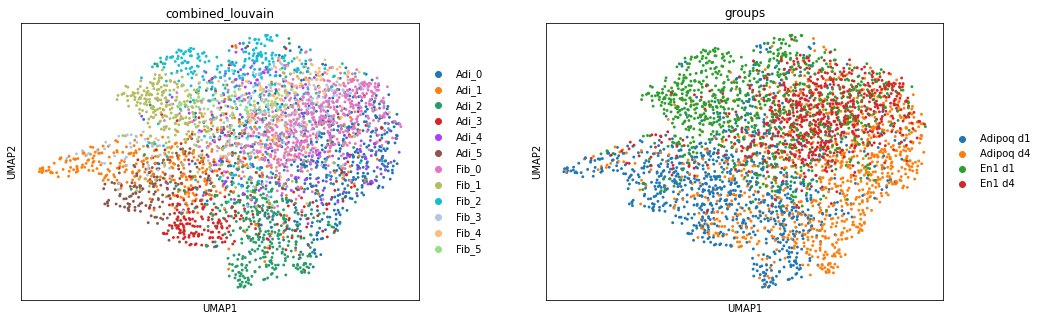

In [3]:
plt.rcParams['figure.figsize'] = (7, 5)

## Load object
folder = "/mnt/platte_2/Data_Objects/Scanpy_Objects/"
adata = sc.read(folder + "200614_Shruthi_SCRB_AdiFibs_combined_counts.h5ad")
sc.pl.umap(adata, color = ["combined_louvain", "groups"], wspace = 0.2)

### Read in Table containing Genes of interest (e.g. AllMarkers, diffxpy)
Alternatively you can also provide a list of genes manually, but having these tables is the most common use-case.

In [7]:
folder = "/home/agando/Documents/Meshal/PhD_Scripts/short_scripts/Rinkevich/Shruthi_Adipoc/SCRB-seq/Data/DGE_by_day/"
tab = pd.read_csv(folder + "diffxpy_AdipoqD1_vs_AdipoqD4.txt", sep = "\t", index_col = 0)
tab.head()

,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll,pct.Adipoq d1,pct.Adipoq d4,-log_FDR
gene,,,,,,,,,,,,
eGFP,0.0,0.0,0.879099,128.689482,False,1.781857e-09,0.879099,0.040242,-10134.895972,1.000000,1.000000,inf
Uqcrq,0.0,0.0,0.726362,25.420232,False,3.143296e-08,0.726362,0.054202,-6994.483066,0.921860,0.946721,inf
Rpl18a,0.0,0.0,0.981040,40.634122,False,2.616756e-08,0.981040,0.040124,-7900.809286,0.983185,0.993852,inf
Bola3,0.0,0.0,1.033571,2.102164,False,1.327490e-07,1.033571,0.119320,-2420.080656,0.243323,0.361680,inf
Ribc2,0.0,0.0,1.080758,0.612481,False,1.985457e-07,1.080758,0.113000,-1711.497159,0.118694,0.385246,inf


In [6]:
## Prepare GSEA Tool object (only once), specify organism either human or mouse for this
goeaobj, convert = gsea.prepare_gsea(organism = "mouse", background_genes = adata.var_names.values)

/home/agando/Documents/Meshal/PhD_Scripts/for_orientation/GOATools/go-basic.obo: fmt(1.2) rel(2020-05-02) 47,240 GO Terms
HMS:0:00:04.652672 380,587 annotations, 24,341 genes, 18,381 GOs, 1 taxids READ: /home/agando/Documents/Meshal/PhD_Scripts/for_orientation/GOATools/gene2go 
Using 16574 genes as background gene set

Load BP Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
Propagating term counts up: is_a
 83% 13,685 of 16,574 population items found in association

Load CC Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
Propagating term counts up: is_a
 88% 14,579 of 16,574 population items found in association

Load MF Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
Propagating term counts up: is_a
 79% 13,170 of 16,574 population items found in association


### Define list of upregulated genes based on some thresholding criteria

In [19]:
## Selecting genes significantly upregulated in Adipocyte population at day 4
tab = tab[tab.qval < 0.05].copy()
min_pct_thresh = 0.1

up_genes = tab[(tab.log2fc > 1) & (tab.loc[:, "pct.Adipoq d4"] > min_pct_thresh)].index.values
print(len(up_genes))

136


In [20]:
gsea_res = gsea.gsea_on_cluster(goeaobj, convert, genes = up_genes, pval_thresh = 0.1)
gsea_res.head()

Using 108 genes
149 Significant Terms out of 21598 Terms
Significant results = 113 BP + 28 MF + 8 CC


,category,GO_ID,GO_name,adj_pval,ratio_in_study,ratio_in_pop
0,BP,GO:0071456,cellular response to hypoxia,0.000005,"(9, 108)","(66, 16574)"
1,BP,GO:0036294,cellular response to decreased oxygen levels,0.000005,"(9, 108)","(70, 16574)"
2,BP,GO:0071453,cellular response to oxygen levels,0.000013,"(9, 108)","(83, 16574)"
3,BP,GO:0006096,glycolytic process,0.000013,"(7, 108)","(38, 16574)"
4,BP,GO:0018401,peptidyl-proline hydroxylation to 4-hydroxy-L-...,0.000013,"(5, 108)","(11, 16574)"


In [ ]:
## Save Gene Set Enrichment Result Table
folder = "/home/agando/Documents/Meshal/PhD_Scripts/short_scripts/Rinkevich/Shruthi_Adipoc/SCRB-seq/Data/DGE_by_day/"
gsea_res.to_csv(out_folder + "GSEA_Adipoq_d4_upregulated.txt", sep = "\t", index = False)